## Exercise to detect DGA.

In this notebook we're going to use some python modules to explore, understand and classify domains as being 'legit' or having a high probability of being generated by a DGA.

### Python Modules Used:
- Pandas: Python Data Analysis Library (http://pandas.pydata.org)
- Scikit Learn (http://scikit-learn.org) Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
- Matplotlib:  Python 2D plotting library (http://matplotlib.org)

**Suggestions/Comments:**
Please send suggestions or bugs (I'm sure) to me. Also if you have some datasets or would like to explore alternative approaches please touch base.



In [ ]:
# Install and check libs

!! pip install matplotlib
!! pip install -U scikit-learn
!! pip install --upgrade pandas
!! pip install --upgrade numpy
!! pip install --upgrade pylab
!! pip install --upgrade sklearn.feature_extraction
!! pip install --upgrade matplotlib

In [147]:
import pylab
import numpy as np
import pandas as pd
import sklearn.feature_extraction
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
# Set default pylab stuff
pylab.rcParams['figure.figsize'] = (14.0, 5.0)
pylab.rcParams['axes.grid'] = True

In [149]:
# Version 0.12.0 of Pandas has a DeprecationWarning about Height blah that I'm ignoring
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [150]:
# This is the Alexa 100k domain list, I am not using the 1 Million just for speed reasons.
alexa_dataframe = pd.read_csv('data/alexa_100k.csv', names=['rank','uri'], header=None, encoding='utf-8')
alexa_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   rank    100000 non-null  int64 
 1   uri     100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [151]:
alexa_dataframe.head(10)

,rank,uri
0,1,facebook.com
1,2,google.com
2,3,youtube.com
3,4,yahoo.com
4,5,baidu.com
5,6,wikipedia.org
6,7,amazon.com
7,8,live.com
8,9,qq.com
9,10,taobao.com


In [152]:
# Each element in the URL may contain some segregation marks within itself. 
# For example, a distinction is made by using the “-” sign in the Domain Name in the URL ‘abc-company.com’. 
# Similarly, it can be used with characters such as “ =, ?, & ” in the Path field. 
# Before starting the URL preprocessing, words separated by any separating character for each URL are obtained and added to the word list to be analyzed. 
# For this step used ‘tldextract’ tool from github.

import tldextract

def domain_extract(uri):
    ext = tldextract.extract(uri)
    if (not ext.suffix):
        return np.nan
    else:
        return ext.domain

alexa_dataframe['domain'] = [ domain_extract(uri) for uri in alexa_dataframe['uri']]
del alexa_dataframe['rank']
del alexa_dataframe['uri']

# sort new dataset
alexa_dataframe.head()

,domain
0,facebook
1,google
2,youtube
3,yahoo
4,baidu


In [153]:
alexa_dataframe.tail()

,domain
99995,rhbabyandchild
99996,rm
99997,sat1
99998,nahimunkar
99999,musi


In [154]:
# It's possible we have NaNs from blanklines or whatever
alexa_dataframe = alexa_dataframe.dropna()
alexa_dataframe = alexa_dataframe.drop_duplicates()

# Set the class
alexa_dataframe['class'] = 'legit'

# Shuffle the data (important for training/testing)
alexa_dataframe = alexa_dataframe.reindex(np.random.permutation(alexa_dataframe.index))
alexa_total = alexa_dataframe.shape[0]
print ('Total Alexa domains %d' % alexa_total)

# If you want
# Hold out 10%
#hold_out_alexa = alexa_dataframe[alexa_total:]*0.9
#alexa_dataframe = alexa_dataframe[:alexa_total]*0.9

#print ('Number of Alexa domains: ' % alexa_dataframe.shape[0])

Total Alexa domains 91369


In [155]:
alexa_dataframe.head()

,domain,class
14066,cnsafety,legit
57520,picdn,legit
42018,dincool,legit
19364,emv3,legit
14396,safelinking,legit


In [156]:
# Read in the DGA domains
dga_dataframe = pd.read_csv('dga_domains2.txt', names=['raw_domain'], header=None, encoding='utf-8')
dga_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   raw_domain  5119 non-null   object
dtypes: object(1)
memory usage: 40.1+ KB


In [157]:
dga_dataframe.head(10)

,raw_domain
0,04055051be412eea5a61b7da8438be3d.info
1,1cb8a5f36f.info
2,30acd347397c34fc273e996b22951002.org
3,336c986a284e2b3bc0f69f949cb437cb.info
4,336c986a284e2b3bc0f69f949cb437cb.org
5,40a43e61e56a5c218cf6c22aca27f7ee.org
6,4ab8fcb17d.biz
7,54cd4a9d63.org
8,55ae81a098.biz
9,5915776a38968a1a759b23279d5ec5db.info


In [158]:
# We noticed that the blacklist values just differ by captilization or .com/.org/.info
dga_dataframe['domain'] = dga_dataframe.applymap(lambda x: x.split('.')[0].strip().lower())
del dga_dataframe['raw_domain']

# It's possible we have NaNs from blanklines or whatever
dga_dataframe = dga_dataframe.dropna()
dga_dataframe = dga_dataframe.drop_duplicates()
dga_total = dga_dataframe.shape[0]
print ('Total DGA domains %d' % dga_total)

# Set the class
dga_dataframe['class'] = 'dga'

# If you want
# Hold out 10%
# hold_out_dga = dga_dataframe[dga_total*.9:]
# dga_dataframe = dga_dataframe[:dga_total*.9]

#print 'Number of DGA domains: %d' % dga_dataframe.shape[0]

Total DGA domains 5102


In [159]:
dga_dataframe.tail()

,domain,class
5114,titleconsultenhancescrew,dga
5115,conversationmarketflower,dga
5116,engineeradmirecarrycommit,dga
5117,knifesmokeoilcelebrateassure,dga
5118,quarterguyprofilemailtrade,dga


In [160]:
# Concatenate the domains in a big pile!
all_domains = pd.concat([alexa_dataframe, dga_dataframe], ignore_index=True)

In [165]:
# Add a length field for the domain
all_domains['length'] = [len(x) for x in all_domains['domain']]

# Okay since we're trying to detect dynamically generated domains and short
# domains (length <=6) are crazy random even for 'legit' domains we're going
# to punt on short domains (perhaps just white/black list for short domains?)
all_domains = all_domains[all_domains['length'] > 6]

In [166]:
# Grabbed this from Rosetta Code (rosettacode.org)
import math
from collections import Counter
 
def entropy(s):
    p, lns = Counter(s), float(len(s))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

In [167]:
# Add a entropy field for the domain
all_domains['entropy'] = [entropy(x) for x in all_domains['domain']]

In [168]:
all_domains.head()

,domain,class,length,entropy
0,cnsafety,legit,8,3.000000
2,dincool,legit,7,2.521641
4,safelinking,legit,11,3.095795
5,yoogiscloset,legit,12,3.022055
6,internationalsexguide,legit,21,3.522572


In [169]:
all_domains.tail()

,domain,class,length,entropy
96466,titleconsultenhancescrew,dga,24,3.490602
96467,conversationmarketflower,dga,24,3.740602
96468,engineeradmirecarrycommit,dga,25,3.383465
96469,knifesmokeoilcelebrateassure,dga,28,3.655046
96470,quarterguyprofilemailtrade,dga,26,3.719295


## Lets plot some stuff!

Text(0, 0.5, 'Domain Entropy')

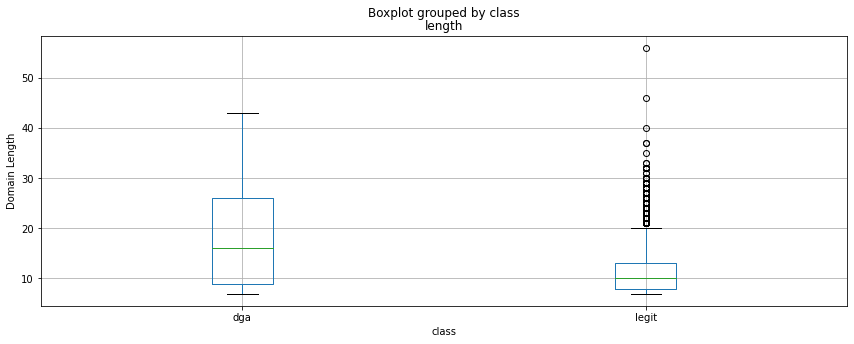

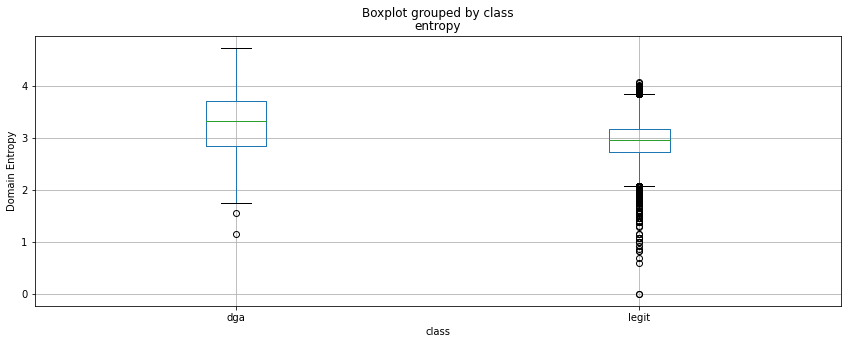

In [170]:
# Boxplots show you the distribution of the data (spread).
# http://en.wikipedia.org/wiki/Box_plot

# Plot the length and entropy of domains
all_domains.boxplot('length','class')
pylab.ylabel('Domain Length')
all_domains.boxplot('entropy','class')
pylab.ylabel('Domain Entropy')

Text(0, 0.5, 'Domain Entropy')

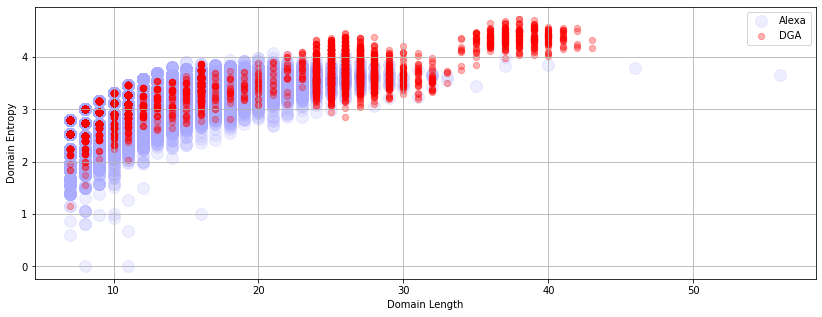

In [171]:
# Split the classes up so we can set colors, size, labels
cond = all_domains['class'] == 'dga'
dga = all_domains[cond]
alexa = all_domains[~cond]
plt.scatter(alexa['length'], alexa['entropy'], s=140, c='#aaaaff', label='Alexa', alpha=.2)
plt.scatter(dga['length'], dga['entropy'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Domain Entropy')

# Below you can see that our DGA domains do tend to have higher entropy than Alexa on average.

In [172]:
# Lets look at the types of domains that have entropy higher than 4
high_entropy_domains = all_domains[all_domains['entropy'] > 4]
print ('Num Domains above 4 entropy: %.2f%% %d (out of %d)' % \
            (100.0*high_entropy_domains.shape[0]/all_domains.shape[0],high_entropy_domains.shape[0],all_domains.shape[0]))
print ("Num high entropy legit: %d" % high_entropy_domains[high_entropy_domains['class']=='legit'].shape[0])
print ("Num high entropy DGA: %d" % high_entropy_domains[high_entropy_domains['class']=='dga'].shape[0])

high_entropy_domains[high_entropy_domains['class']=='legit'].head()

# Looking at the results below, we do see that there are more domains
# in the DGA group that are high entropy but only a small percentage
# of the domains are in that high entropy range...

Num Domains above 4 entropy: 0.92% 664 (out of 72242)
Num high entropy legit: 3
Num high entropy DGA: 661


,domain,class,length,entropy
12277,burzhunetdlyachaynikov,legit,22,4.004886
19736,congresomundialjjrperu2009,legit,26,4.056021
22636,theukwebdesigncompany,legit,21,4.070656


In [173]:
high_entropy_domains[high_entropy_domains['class']=='dga'].head()

,domain,class,length,entropy
91387,a17btkyb38gxe41pwd50nxmzjxiwjwdwfrp52,dga,37,4.540402
91388,a17c49l68ntkqnuhvkrmyb28fubvn30e31g43dq,dga,39,4.631305
91389,a17d60gtnxk47gskti15izhvlviyksh64nqkz,dga,37,4.270132
91390,a17erpzfzh64c69csi35bqgvp52drita67jzmy,dga,38,4.629249
91391,a17fro51oyk67b18ksfzoti55j36p32o11fvc29cr,dga,41,4.305859


In [184]:
# In preparation for using scikit learn we're just going to use
# some handles that help take us from pandas land to scikit land

# List of feature vectors (scikit learn uses 'X' for the matrix of feature vectors)

X=all_domains[['length','entropy']]

y=all_domains[['class']]
z= y.values.ravel()

# Labels (scikit learn uses 'y' for classification labels)

In [185]:
# Random Forest is a popular ensemble machine learning classifier.
# http://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#
import sklearn.ensemble
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=20) # Trees in the forest

In [186]:
from sklearn.model_selection import cross_val_score, cross_validate
scores = sklearn.model_selection.cross_val_score(clf, X, y, cv=4, n_jobs=3)
print(scores)

/Users/ysrsnmz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ysrsnmz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ysrsnmz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ysrsnmz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[0.94247273 0.93765572 0.94977852 0.95260244]


In [187]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=38)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9575749186794934


In [188]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rf_model = KNeighborsClassifier()
rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9509308602671465


In [189]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rf_model = DecisionTreeClassifier()
rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9544605162987058


In [190]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rf_model = AdaBoostClassifier()
rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9561215309017925


In [191]:
# So we dive in a bit and look at the predictive performance more deeply.
# Train on a 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)

In [193]:
# Well our Mom told us we were still cool.. so with that encouragement we're
# going to compute NGrams for every Alexa domain and see if we can use the
# NGrams to help us better differentiate and mark DGA domains...

# Scikit learn has a nice NGram generator that can generate either char NGrams or word NGrams (we're using char).
# Parameters: 
#       - ngram_range=(3,5)  # Give me all ngrams of length 3, 4, and 5
#       - min_df=1e-4        # Minimumum document frequency. At 1e-4 we're saying give us NGrams that 
#                            # happen in at least .1% of the domains (so for 100k... at least 100 domains)

alexa_vc = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-4, max_df=1.0)

In [194]:
# I'm SURE there's a better way to store all the counts but not sure...
# At least the min_df parameters has already done some thresholding
counts_matrix = alexa_vc.fit_transform(alexa_dataframe['domain'])
alexa_counts = np.log10(counts_matrix.sum(axis=0).getA1())
ngrams_list = alexa_vc.get_feature_names_out()

In [196]:
# For fun sort it and show it
import operator
_sorted_ngrams = sorted(zip(ngrams_list, alexa_counts), key=operator.itemgetter(1), reverse=True)
print ('Alexa NGrams: %d' % len(_sorted_ngrams))
for ngram, count in _sorted_ngrams[:10]:
    print (ngram, count)

Alexa NGrams: 23613
ing 3.443888546777372
lin 3.4271614029259654
ine 3.399673721481038
tor 3.26528962586083
ter 3.2631624649622166
ion 3.246252312299322
ent 3.228913405994688
por 3.2013971243204513
the 3.2005769267548483
ree 3.16345955176999


In [197]:
# We're also going to throw in a bunch of dictionary words
word_dataframe = pd.read_csv('data/words.txt', names=['word'], header=None, dtype={'word': np.str}, encoding='utf-8')

# Cleanup words from dictionary
word_dataframe = word_dataframe[word_dataframe['word'].map(lambda x: str(x).isalpha())]
word_dataframe = word_dataframe.applymap(lambda x: str(x).strip().lower())
word_dataframe = word_dataframe.dropna()
word_dataframe = word_dataframe.drop_duplicates()
word_dataframe.head(10)

,word
35,a
46,aa
49,aaa
51,aaaa
52,aaaaaa
53,aaal
54,aaas
55,aaberg
56,aachen
57,aae


In [198]:
# Now compute NGrams on the dictionary words
# Same logic as above...
dict_vc = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-5, max_df=1.0)
counts_matrix = dict_vc.fit_transform(word_dataframe['word'])
dict_counts = np.log10(counts_matrix.sum(axis=0).getA1())
ngrams_list = dict_vc.get_feature_names_out()

In [199]:
# For fun sort it and show it
import operator
_sorted_ngrams = sorted(zip(ngrams_list, dict_counts), key=operator.itemgetter(1), reverse=True)
print ('Word NGrams: %d' % len(_sorted_ngrams))
for ngram, count in _sorted_ngrams[:10]:
    print (ngram, count)

Word NGrams: 123061
ing 4.387300822448285
ess 4.204879333760662
ati 4.1933472563864616
ion 4.165036479994566
ter 4.162415036106447
nes 4.112504458767161
tio 4.076822423342773
ate 4.0723602039634885
ent 4.069631102620343
tion 4.0496056125949735


In [201]:
# We use the transform method of the CountVectorizer to form a vector
# of ngrams contained in the domain, that vector is than multiplied
# by the counts vector (which is a column sum of the count matrix).
def ngram_count(domain):
    alexa_match = alexa_counts * alexa_vc.transform([domain]).T  # Woot vector multiply and transpose Woo Hoo!
    dict_match = dict_counts * dict_vc.transform([domain]).T
    print ('%s Alexa match:%d Dict match: %d' % (domain, alexa_match, dict_match))

# Examples:

ngram_count('google')
ngram_count('facebook')
ngram_count('1cb8a5f36f')
ngram_count('deneme123')
ngram_count('turkcetesti')
ngram_count('textmininglecture')
ngram_count('csesvb34jvb')
ngram_count('4ddadjr42vns')


google Alexa match:17 Dict match: 14
facebook Alexa match:31 Dict match: 27
1cb8a5f36f Alexa match:0 Dict match: 0
deneme123 Alexa match:17 Dict match: 20
turkcetesti Alexa match:28 Dict match: 40
textmininglecture Alexa match:64 Dict match: 91
csesvb34jvb Alexa match:5 Dict match: 6
4ddadjr42vns Alexa match:4 Dict match: 7


In [202]:
# Compute NGram matches for all the domains and add to dataframe

all_domains['alexa_grams']= alexa_counts * alexa_vc.transform(all_domains['domain']).T 
all_domains['word_grams']= dict_counts * dict_vc.transform(all_domains['domain']).T 
all_domains.head()

,domain,class,length,entropy,alexa_grams,word_grams
0,cnsafety,legit,8,3.000000,13.198625,20.360346
2,dincool,legit,7,2.521641,16.553097,21.653286
4,safelinking,legit,11,3.095795,49.942067,51.714367
5,yoogiscloset,legit,12,3.022055,26.296762,46.436607
6,internationalsexguide,legit,21,3.522572,103.322152,125.999414


In [203]:
all_domains.tail()

,domain,class,length,entropy,alexa_grams,word_grams
96466,titleconsultenhancescrew,dga,24,3.490602,87.649377,133.523985
96467,conversationmarketflower,dga,24,3.740602,108.361027,148.469411
96468,engineeradmirecarrycommit,dga,25,3.383465,89.838310,132.965937
96469,knifesmokeoilcelebrateassure,dga,28,3.655046,78.862515,133.545104
96470,quarterguyprofilemailtrade,dga,26,3.719295,99.701859,128.649366


In [204]:
# Use the vectorized operations of the dataframe to investigate differences
# between the alexa and word grams

all_domains['diff'] = all_domains['alexa_grams'] - all_domains['word_grams']
all_domains.sort_values(['diff'], ascending=True).head(10)

# The table below shows those domain names that are more 'dictionary' and less 'web'

,domain,class,length,entropy,alexa_grams,word_grams,diff
95468,nothingoccasionconcernappreciate,dga,32,3.391127,116.088435,202.444707,-86.356272
95542,clickinfluencerecoverorganize,dga,29,3.551971,99.644014,184.537266,-84.893252
95614,authorleadliftmentioninfluence,dga,30,3.631402,98.901050,183.013785,-84.112735
96109,bedroomidentifyinvitecommunicate,dga,32,3.667838,118.882882,201.868270,-82.985388
95529,indicationstructuretransition,dga,29,3.272665,142.453055,225.001696,-82.548642
96432,caseshinepitchlipoccurinfluence,dga,31,3.587599,85.298408,167.613096,-82.314688
96248,sectionappreciateinfluence,dga,26,3.474505,92.888498,174.191842,-81.303343
95629,fingerbeatinfluencefootchampion,dga,31,3.784368,99.196668,179.828589,-80.631921
96352,emergencyattemptadmireproposed,dga,30,3.555913,89.589282,169.987756,-80.398474
95852,patientreadorganizemindassociate,dga,32,3.590018,117.468834,196.938334,-79.469500


In [206]:
all_domains.sort_values(['diff'], ascending=False).head(10)

# The table below shows those domain names that are more 'web' and less 'dictionary'

,domain,class,length,entropy,alexa_grams,word_grams,diff
17359,gay-sex-pics-porn-pictures-gay-sex-porn-gay-se...,legit,56,3.661056,159.642633,85.124184,74.518449
83290,article-directory-free-submission-free-content,legit,46,3.786816,235.229615,188.230453,46.999163
32746,stream-free-movies-online,legit,25,3.509275,120.250616,74.496915,45.753701
14934,watch-free-movie-online,legit,23,3.708132,103.029245,58.943451,44.085794
25247,best-online-shopping-site,legit,25,3.452879,123.376840,79.596640,43.780200
85292,social-bookmarking-sites-list,legit,29,3.702472,145.754865,102.261826,43.493039
38305,free-online-directory,legit,21,3.403989,123.379411,80.735030,42.644380
48937,free-links-articles-directory,legit,29,3.702472,153.238728,110.955361,42.283366
19849,online-web-directory,legit,20,3.584184,116.310390,74.082948,42.227442
53116,web-directory-online,legit,20,3.584184,114.402344,74.082948,40.319395


Text(0, 0.5, 'Alexa NGram Matches')

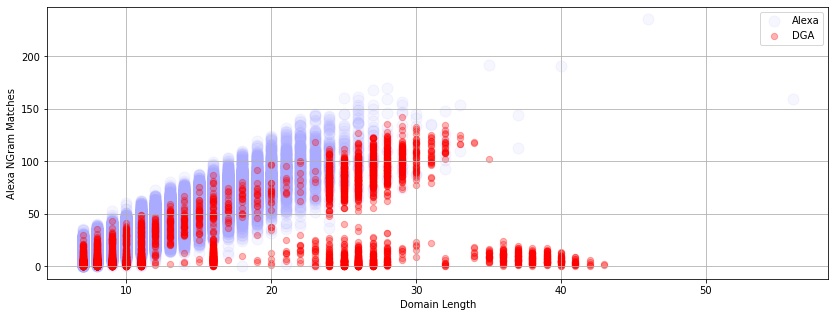

In [207]:
# Lets plot some stuff!
# Here we want to see whether our new 'alexa_grams' feature can help us differentiate between Legit/DGA
cond = all_domains['class'] == 'dga'
dga = all_domains[cond]
legit = all_domains[~cond]
plt.scatter(legit['length'], legit['alexa_grams'], s=120, c='#aaaaff', label='Alexa', alpha=.1)
plt.scatter(dga['length'], dga['alexa_grams'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Alexa NGram Matches')

Text(0, 0.5, 'Alexa Gram Matches')

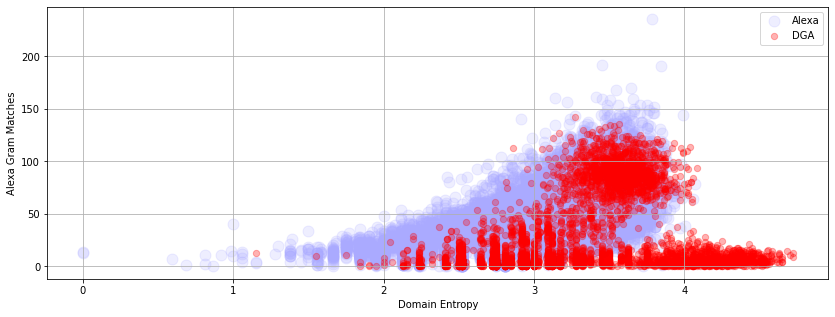

In [208]:
# Lets plot some stuff!
# Here we want to see whether our new 'alexa_grams' feature can help us differentiate between Legit/DGA
cond = all_domains['class'] == 'dga'
dga = all_domains[cond]
legit = all_domains[~cond]
plt.scatter(legit['entropy'], legit['alexa_grams'],  s=120, c='#aaaaff', label='Alexa', alpha=.2)
plt.scatter(dga['entropy'], dga['alexa_grams'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Entropy')
pylab.ylabel('Alexa Gram Matches')

Text(0, 0.5, 'Dictionary NGram Matches')

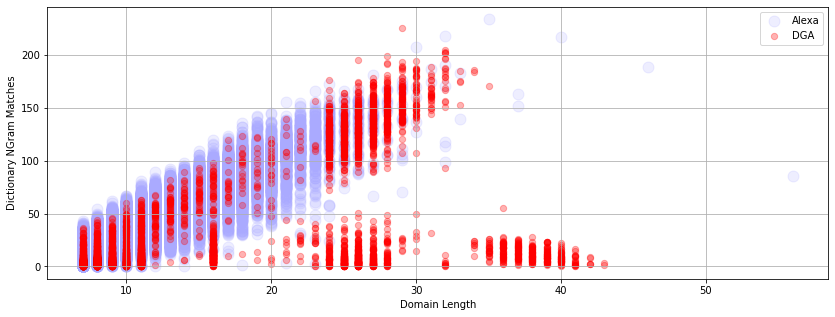

In [209]:
# Lets plot some stuff!
# Here we want to see whether our new 'word_grams' feature can help us differentiate between Legit/DGA
# Note: It doesn't look quite as good as the Alexa_grams but it might generalize better (less overfit).
cond = all_domains['class'] == 'dga'
dga = all_domains[cond]
legit = all_domains[~cond]
plt.scatter(legit['length'], legit['word_grams'],  s=120, c='#aaaaff', label='Alexa', alpha=.2)
plt.scatter(dga['length'], dga['word_grams'], s=40, c='r', label='DGA', alpha=.3)
plt.legend()
pylab.xlabel('Domain Length')
pylab.ylabel('Dictionary NGram Matches')

In [210]:
# Lets look at which Legit domains are scoring low on the word gram count
all_domains[(all_domains['word_grams']==0)].head()

,domain,class,length,entropy,alexa_grams,word_grams,diff
469,520e314,legit,7,2.807355,1.113943,0.0,1.113943
1410,ggmm777,legit,7,1.556657,1.518514,0.0,1.518514
1499,qq66699,legit,7,1.556657,1.342423,0.0,1.342423
2264,dftc777,legit,7,2.128085,2.773786,0.0,2.773786
3033,vi-vi-vi,legit,8,1.561278,3.432007,0.0,3.432007


In [211]:
all_domains[all_domains['class']=='legit'].describe()

,length,entropy,alexa_grams,word_grams,diff
count,67308.000000,67308.000000,67308.000000,67308.000000,67308.000000
mean,10.866836,2.930049,33.397829,40.722075,-7.324246
std,3.385629,0.346481,19.498738,23.237549,9.343342
min,7.000000,-0.000000,0.000000,0.000000,-73.518139
25%,8.000000,2.725481,19.229395,23.923738,-12.452428
50%,10.000000,2.947703,28.978250,36.119830,-6.693376
75%,13.000000,3.169925,42.852118,52.856210,-1.595872
max,56.000000,4.070656,235.229615,233.648571,74.518449


Text(0, 0.5, 'Maximum NGram Score')

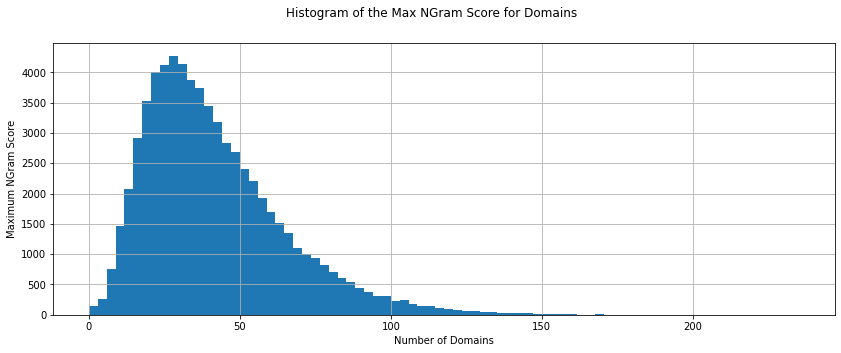

In [212]:
# Lets look at how many domains that are both low in word_grams and alexa_grams (just plotting the max of either)
legit = all_domains[(all_domains['class']=='legit')]
max_grams = np.maximum(legit['alexa_grams'],legit['word_grams'])
ax = max_grams.hist(bins=80)
ax.figure.suptitle('Histogram of the Max NGram Score for Domains')
pylab.xlabel('Number of Domains')
pylab.ylabel('Maximum NGram Score')

In [214]:
# Lets look at which Legit domains are scoring low on both alexa and word gram count

weird_cond = (all_domains['class']=='legit') & (all_domains['word_grams']<3) & (all_domains['alexa_grams']<2)
weird = all_domains[weird_cond]
print (weird.shape[0])
weird.head(10)

91


,domain,class,length,entropy,alexa_grams,word_grams,diff
469,520e314,legit,7,2.807355,1.113943,0.000000,1.113943
1410,ggmm777,legit,7,1.556657,1.518514,0.000000,1.518514
1499,qq66699,legit,7,1.556657,1.342423,0.000000,1.342423
3189,gxwmbbs,legit,7,2.521641,1.838849,1.322219,0.516630
3725,jmm1818,legit,7,1.950212,0.000000,0.000000,0.000000
3829,757207049,legit,9,2.419382,0.000000,0.000000,0.000000
4619,d4ffr55,legit,7,2.235926,1.079181,2.260071,-1.180890
4645,pdf2jpg,legit,7,2.521641,1.770852,0.000000,1.770852
4793,5278bbs,legit,7,2.521641,1.838849,1.322219,0.516630
8034,shzxgov,legit,7,2.807355,1.698970,2.000000,-0.301030


In [215]:
# Epiphany... Alexa really may not be the best 'exemplar' set...  
#             (probably a no-shit moment for everyone else :)
#
# Discussion: If you're using these as exemplars of NOT DGA, then your probably
#             making things very hard on your machine learning algorithm.
#             Perhaps we should have two categories of Alexa domains, 'legit'
#             and a 'weird'. based on some definition of weird.
#             Looking at the entries above... we have approx 80 domains
#             that we're going to mark as 'weird'.
#
all_domains.loc[weird_cond, 'class'] = 'weird'
print (all_domains['class'].value_counts())
all_domains[all_domains['class'] == 'weird'].head()

legit    67217
dga       4934
weird       91
Name: class, dtype: int64


,domain,class,length,entropy,alexa_grams,word_grams,diff
469,520e314,weird,7,2.807355,1.113943,0.000000,1.113943
1410,ggmm777,weird,7,1.556657,1.518514,0.000000,1.518514
1499,qq66699,weird,7,1.556657,1.342423,0.000000,1.342423
3189,gxwmbbs,weird,7,2.521641,1.838849,1.322219,0.516630
3725,jmm1818,weird,7,1.950212,0.000000,0.000000,0.000000


In [216]:
# Now we try our machine learning algorithm again with the new features
# Alexa and Dictionary NGrams and the exclusion of the bad exemplars.

X=all_domains[['alexa_grams','word_grams','length','entropy']]
y=all_domains[['class']]

# Train on a 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)

In [223]:
# Perhaps we will just exclude the weird class from our ML training
not_weird = all_domains[all_domains['class'] != 'weird']
#X = not_weird.as_matrix(['length', 'entropy', 'alexa_grams', 'word_grams'])

X=all_domains[['alexa_grams','word_grams','length','entropy']]
y=all_domains[['class']]

# Train on a 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)

In [225]:
# Now we can use scikit learn's cross validation to assess predictive performance.

from sklearn.model_selection import cross_val_score, cross_validate
scores = sklearn.model_selection.cross_val_score(clf, X, y, cv=4, n_jobs=3)
print(scores)

/Users/ysrsnmz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ysrsnmz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ysrsnmz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ysrsnmz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[0.98278058 0.97862798 0.95509413 0.93255814]


In [226]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=38)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9786144369852585


In [227]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rf_model = KNeighborsClassifier()
rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score: 0.9751539898954945


In [228]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rf_model = DecisionTreeClassifier()
rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))


Accuracy score: 0.9626271714305489


In [229]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rf_model = AdaBoostClassifier()
rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

accuracy_score(y_test, y_pred)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))


Accuracy score: 0.941172399474012
